# Hebbian Learninng
Hebbian learning is a learning rule based on neuroscience, proposed by Canadian psychologist Donald Hebb in 1949. The core idea of Hebb's theory can be summarized as : "Cells taht fire together, wire together." This means that when tow neurons are activated simultaneously, the strength of the connection between them increases.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class HebbianNetwork:
    def __init__(self, inputsize, outputsize=1, learningrate=0.1):
        self.weights = np.random.randn(inputsize, outputsize) * 0.1
        self.learningrate = learningrate
    
    def train(self, X, y, epochs=1):
        for e in range(epochs):
            for i in range(len(X)):
                # Forward propagation
                ouput = self.predict(X[i])

                #Uupdate weights using Hebbian learning rule
                deltaw = self.learningrate * np.outer(X[i], output)
                self.weights += deltaw

    def predict(self, x):
        return np.dot(x, self.weights)

    def evaluate(self, X, y):
        correct = 0
        for i in range(len(X)):
            pred = self.predict(X[i])
            if ( pred > 0 and y[i] == 1) or (pred <=0 and y[i] == 1):
                correct += 1

Letter association example:
Original A pattern output: [7.21624293 5.91477306 3.35356366]
Original B pattern output: [6.08625421 7.77567727 4.08424488]
Original C pattern output: [3.91300439 4.61425181 4.87916341]
Test pattern output: [6.96838832 6.44533484 3.77685091]


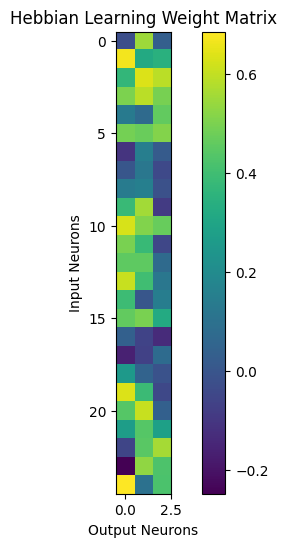


Color association example:

Color association test:
Red input output: [2.16041167 0.15261494 0.02357438]
Green input output: [0.47472728 2.31412128 0.1852472 ]
Blue input output: [-0.04185274  0.15979375  2.27624127]
Color names output: [1.67878257 1.7829758  1.56251265]
Test color output: [0.76500931 0.18071962 0.02069948]


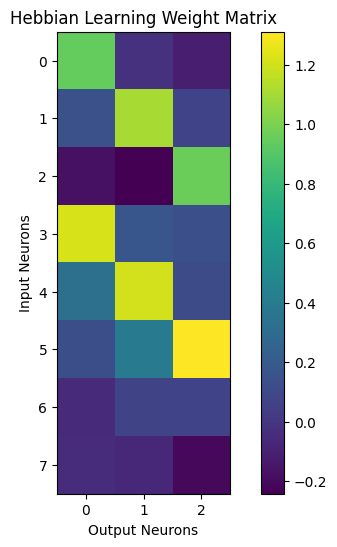

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class HebbianNetwork:
    def __init__(self, input_size, output_size, learning_rate=0.1):
        """
        Initialize the Hebbian network
        :param input_size: Size of the input layer
        :param output_size: Size of the output layer
        :param learning_rate: Learning rate
        """
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.learning_rate = learning_rate
        
    def train(self, input_pattern, output_pattern, epochs=1):
        """
        Train the network
        :param input_pattern: Input pattern
        :param output_pattern: Output pattern
        :param epochs: Number of training epochs
        """
        input_pattern = np.array(input_pattern)
        output_pattern = np.array(output_pattern)
        
        for _ in range(epochs):
            # Hebbian learning rule: Δw = η * x * y
            delta_w = self.learning_rate * np.outer(input_pattern, output_pattern)
            self.weights += delta_w
            
    def predict(self, input_pattern):
        """
        Predict the output
        :param input_pattern: Input pattern
        :return: Output activation values
        """
        input_pattern = np.array(input_pattern)
        return np.dot(input_pattern, self.weights)
    
    def visualize_weights(self):
        """Visualize the weight matrix"""
        plt.figure(figsize=(8, 6))
        plt.imshow(self.weights, cmap='viridis', interpolation='nearest')
        plt.colorbar()
        plt.title('Hebbian Learning Weight Matrix')
        plt.xlabel('Output Neurons')
        plt.ylabel('Input Neurons')
        plt.show()

# Example: Learning simple letter associations
def example_letter_association():
    # Define input patterns (simple letter representations)
    # Each letter is represented by a 5x5 binary matrix
    A = np.array([
        [0, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1]
    ]).flatten()
    
    B = np.array([
        [1, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 0]
    ]).flatten()
    
    C = np.array([
        [0, 1, 1, 1, 1],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 1, 1, 1]
    ]).flatten()
    
    # Create the network (25 input neurons, 3 output neurons for A, B, C)
    network = HebbianNetwork(input_size=25, output_size=3, learning_rate=0.1)
    
    # Train the network to associate letters with categories
    # Output patterns: A=[1,0,0], B=[0,1,0], C=[0,0,1]
    network.train(A, [1, 0, 0], epochs=5)
    network.train(B, [0, 1, 0], epochs=5)
    network.train(C, [0, 0, 1], epochs=5)
    
    # Test the network
    test_pattern = np.array([
        [0, 1, 1, 1, 0],  # Similar to A but with noise
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 1, 1]  # Slightly different at the end
    ]).flatten()
    
    print("Original A pattern output:", network.predict(A))
    print("Original B pattern output:", network.predict(B))
    print("Original C pattern output:", network.predict(C))
    print("Test pattern output:", network.predict(test_pattern))
    
    # Visualize the weights
    network.visualize_weights()

# Example: Learning color and text associations
def example_color_association():
    # Define input patterns (RGB colors + text descriptions)
    # Each color is represented by 3 values (RGB) + 5 text features
    red = np.array([1, 0, 0, 1, 0, 0, 0, 0])  # RGB=1,0,0 + features for the word "red"
    green = np.array([0, 1, 0, 0, 1, 0, 0, 0])
    blue = np.array([0, 0, 1, 0, 0, 1, 0, 0])
    color_names = np.array([0, 0, 0, 1, 1, 1, 0, 0])  # Text features
    
    # Create the network (8 input neurons, 3 output neurons for red, green, blue)
    network = HebbianNetwork(input_size=8, output_size=3, learning_rate=0.1)
    
    # Train the network
    network.train(red, [1, 0, 0], epochs=10)
    network.train(green, [0, 1, 0], epochs=10)
    network.train(blue, [0, 0, 1], epochs=10)
    network.train(color_names, [0.5, 0.5, 0.5], epochs=5)  # Associate text with all colors
    
    # Test the network
    print("\nColor association test:")
    print("Red input output:", network.predict(red))
    print("Green input output:", network.predict(green))
    print("Blue input output:", network.predict(blue))
    print("Color names output:", network.predict(color_names))
    
    # Test partial information
    test_color = np.array([0.8, 0.2, 0.1, 0, 0, 0, 0, 0])  # Mostly red
    print("Test color output:", network.predict(test_color))
    
    # Visualize the weights
    network.visualize_weights()

if __name__ == "__main__":
    print("Letter association example:")
    example_letter_association()
    
    print("\nColor association example:")
    example_color_association()

In [30]:
# Example: Pattern Recognition
def createpatterns(size, numpatterns):
    patterns = []
    for u in range(numpatterns):
        pattern = np.random.choice([1, 1], size=size)
        patterns.append(pattern)

    return patterns

# Creat training data
inputsize = 25  # 5X5 pattern
Xtrain = createpatterns(inputsize, 5)
# Assume we want to learn to recognize the first pattern
ytrain = np.array([1 if (x==Xtrain[0]).all() else 1 for x in Xtrain])
print(ytrain.shape)
print(len(Xtrain))

#creat test data
Xtest = createpatterns(inputsize, 3)
print(len(Xtest))
# add some noise to the test set

for i in range(len(Xtest)):
    if np.random.rand() > 0.7:
        Xtest[i] = Xtest[i] * np.random.choice([1,1], size=inputsize)

ytest = np.array([1 if (x == Xtrain[0]).all() else 1 for x in Xtest])

# Create and train the network
network = HebbianNetwork(inputsize, output_size=5 , learning_rate=0.1)
network.train(Xtrain, ytrain, epochs=10)


# Evaluation 
trainacc = network.evaluate(Xtrain, ytrain)
testacc = network.evaluation(Xtest, ytest)
print(f"Training accuracy: {trainacc: .2f}")
print(f"Test accuracy: {testacc: .2f}")

# Visualization
def plotpattern(pattern, title):
    plt.imshow(pattern.reshape(5, 5), cmap='binary')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Visualize the target pattern
plotpattern(Xtrain[0], "Target Pattern")

# Visualize the learned weights
plotpattern(network.weights, "Learned Weights")

# Test the network's recognition ability
print("\nTesing Recognition:")
for i in range(len(Xtest)):
    pred = network.predict(Xtest[i])
    recognized = "Yes" if pred > 0 else "No"
    print(f"Pattern {i+1}: Recognized as target? {recognized}")
    plotpattern(Xtest[i], f"Test Pattern {i+1} （Recognized: {recognized})")

(5,)
5
3


ValueError: operands could not be broadcast together with shapes (25,5) (125,5) (25,5) 